# ISMIP6 Antarctica Ice Sheet Model Variable Comparison Tool


This Jupyter notebook can be used to plot and compare a field from multiple ice sheet models directly in the notebook and saving the plot the user's local machine. The chosen model or models will be compared to standard ISMIP6 reference data for all variables.

The user can run the cells in the notebook individually by clicking on each cell and run the cell with the shift+return or shift+enter option or from the Cell menu using the Run Cells or the Run All options.

# Importing python packages

In [1]:
import os,sys
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/cartopy/crs.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from cartopy._crs import CRS, Geodetic, Globe, PROJ4_VERSION


# Set Polar Sterographic Projection definition

Projection can be defined from the loaded model or by setting the definition independent of the model.

In [4]:
# # Method 1: Set model projection from model projection information
# polar_stereographic = ccrs.Stereographic(
#     central_latitude=lithk_proj.latitude_of_projection_origin,
#     central_longitude=lithk_proj.straight_vertical_longitude_from_pole,
#     false_easting=lithk_proj.false_easting,
#     false_northing=lithk_proj.false_northing,
#     true_scale_latitude=lithk_proj.standard_parallel,
#     globe=ccrs.Globe('WGS84')
# )

# Method 2: Set model projection from standard definition
polar_stereographic = ccrs.Stereographic(
    central_latitude=-90.0,
    central_longitude=0.0,
    false_easting=0.0,
    false_northing=0.0,
    true_scale_latitude=-71.0,
    globe=ccrs.Globe('WGS84')
)

# Loading Ice Sheet Models for Surface Mass Balance Flux (acabf)

In [7]:
# Reference Dataset
nc_filename = 'data/acabf_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

acabf = ais_ds['acabf']
acabf_proj = ais_ds['mapping']

/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  


In [6]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/acabf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

acabf_2 = ais_ds_2['acabf']
acabf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/acabf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

acabf_3 = ais_ds_3['acabf']
acabf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/acabf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

acabf_4 = ais_ds_4['acabf']
acabf_4_proj = ais_ds_4['mapping']

/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  """


IOError: [Errno 2] No such file or directory: '/home/vhub/elliotsnitzer/tools/gisplot2/Model/ARC_PISM1/init/acabf_AIS_ARC_PISM1_init.nc'

# Transform projection

In [8]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
acabf_mean = acabf.mean(dim='time').data
acabf_mean = acabf_mean.transpose()
acabf_mean = acabf_mean.flatten()

In [ ]:
# Calculating mean field so we have a single field to plot for file #2
acabf_mean_2 = acabf_2.mean(dim='time').data
acabf_mean_2 = acabf_mean_2.transpose()
acabf_mean_2 = acabf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
acabf_mean_3 = acabf_3.mean(dim='time').data
acabf_mean_3 = acabf_mean_3.transpose()
acabf_mean_3 = acabf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
acabf_mean_4 = acabf_4.mean(dim='time').data
acabf_mean_4 = acabf_mean_4.transpose()
acabf_mean_4 = acabf_mean_4.flatten()

# Plot Ice Sheet Models for Surface Mass Balance Flux (acabf)

/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/apps/share64/debian7/anaconda/anaconda2-5.1/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._t

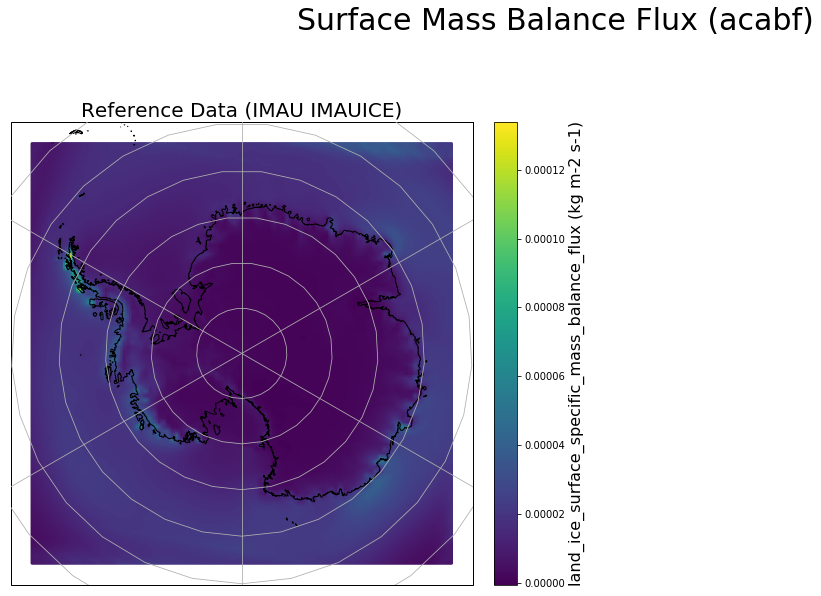

In [9]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=acabf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.acabf.attrs['standard_name'], ais_ds.acabf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Surface Mass Balance Flux (acabf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_acabf_Comparison.png')

plt.show()

In [ ]:
ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=acabf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.acabf.attrs['standard_name'], ais_ds_2.acabf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=acabf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.acabf.attrs['standard_name'], ais_ds_3.acabf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=acabf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.acabf.attrs['standard_name'], ais_ds_4.acabf.attrs['units']), size=16)

# Loading Ice Sheet Models for Ice Thickness Imbalance (dlithkdt)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/dlithkdt_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

dlithkdt = ais_ds['dlithkdt']
dlithkdt_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/dlithkdt_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

dlithkdt_2 = ais_ds_2['dlithkdt']
dlithkdt_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/dlithkdt_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

dlithkdt_3 = ais_ds_3['dlithkdt']
dlithkdt_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/dlithkdt_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

dlithkdt_4 = ais_ds_4['dlithkdt']
dlithkdt_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
dlithkdt_mean = dlithkdt.mean(dim='time').data
dlithkdt_mean = dlithkdt_mean.transpose()
dlithkdt_mean = dlithkdt_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
dlithkdt_mean_2 = dlithkdt_2.mean(dim='time').data
dlithkdt_mean_2 = dlithkdt_mean_2.transpose()
dlithkdt_mean_2 = dlithkdt_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
dlithkdt_mean_3 = dlithkdt_3.mean(dim='time').data
dlithkdt_mean_3 = dlithkdt_mean_3.transpose()
dlithkdt_mean_3 = dlithkdt_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
dlithkdt_mean_4 = dlithkdt_4.mean(dim='time').data
dlithkdt_mean_4 = dlithkdt_mean_4.transpose()
dlithkdt_mean_4 = dlithkdt_mean_4.flatten()

# Plot Ice Sheet Models for Ice Thickness Imbalance (dlithkdt)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=dlithkdt_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.dlithkdt.attrs['standard_name'], ais_ds.dlithkdt.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=dlithkdt_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.dlithkdt.attrs['standard_name'], ais_ds_2.dlithkdt.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=dlithkdt_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.dlithkdt.attrs['standard_name'], ais_ds_3.dlithkdt.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=dlithkdt_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.dlithkdt.attrs['standard_name'], ais_ds_4.dlithkdt.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Ice Thickness Imbalance (dlithkdt)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_lithk_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Mass Balance Flux (libmassbf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/libmassbf_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

libmassbf = ais_ds['libmassbf']
libmassbf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/libmassbf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

libmassbf_2 = ais_ds_2['libmassbf']
libmassbf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/libmassbf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

libmassbf_3 = ais_ds_3['libmassbf']
libmassbf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/libmassbf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

libmassbf_4 = ais_ds_4['libmassbf']
libmassbf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
libmassbf_mean = libmassbf.mean(dim='time').data
libmassbf_mean = libmassbf_mean.transpose()
libmassbf_mean = libmassbf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
libmassbf_mean_2 = libmassbf_2.mean(dim='time').data
libmassbf_mean_2 = libmassbf_mean_2.transpose()
libmassbf_mean_2 = libmassbf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
libmassbf_mean_3 = libmassbf_3.mean(dim='time').data
libmassbf_mean_3 = libmassbf_mean_3.transpose()
libmassbf_mean_3 = libmassbf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
libmassbf_mean_4 = libmassbf_4.mean(dim='time').data
libmassbf_mean_4 = libmassbf_mean_4.transpose()
libmassbf_mean_4 = libmassbf_mean_4.flatten()


# Plot Ice Sheet Models for Basal Mass Balance Flux (libmassbf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=libmassbf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.libmassbf.attrs['standard_name'], ais_ds.libmassbf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=libmassbf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.libmassbf.attrs['standard_name'], ais_ds_2.libmassbf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=libmassbf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.libmassbf.attrs['standard_name'], ais_ds_3.libmassbf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=libmassbf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.libmassbf.attrs['standard_name'], ais_ds_4.libmassbf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Basal Mass Balance Flux (libmassbf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_libmassbf_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Temperature (litempbot)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/litempbot_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

litempbot = ais_ds['litempbot']
litempbot_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/litempbot_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

litempbot_2 = ais_ds_2['litempbot']
litempbot_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/litempbot_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

litempbot_3 = ais_ds_3['litempbot']
litempbot_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/litempbot_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

litempbot_4 = ais_ds_4['litempbot']
litempbot_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
litempbot_mean = litempbot.mean(dim='time').data
litempbot_mean = litempbot_mean.transpose()
litempbot_mean = litempbot_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
litempbot_mean_2 = litempbot_2.mean(dim='time').data
litempbot_mean_2 = litempbot_mean_2.transpose()
litempbot_mean_2 = litempbot_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
litempbot_mean_3 = litempbot_3.mean(dim='time').data
litempbot_mean_3 = litempbot_mean_3.transpose()
litempbot_mean_3 = litempbot_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
litempbot_mean_4 = litempbot_4.mean(dim='time').data
litempbot_mean_4 = litempbot_mean_4.transpose()
litempbot_mean_4 = litempbot_mean_4.flatten()


# Plot Ice Sheet Models for Basal Temperature (litempbot)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=litempbot_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.litempbot.attrs['standard_name'], ais_ds.litempbot.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=litempbot_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.litempbot.attrs['standard_name'], ais_ds_2.litempbot.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=litempbot_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.litempbot.attrs['standard_name'], ais_ds_3.litempbot.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=litempbot_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.litempbot.attrs['standard_name'], ais_ds_4.litempbot.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Basal Temperature (litempbot)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_litempbot_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Surface Temperature (litempsnic)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/litempsnic_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

litempsnic = ais_ds['litempsnic']
litempsnic_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/litempsnic_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

litempsnic_2 = ais_ds_2['litempsnic']
litempsnic_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/litempsnic_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

litempsnic_3 = ais_ds_3['litempsnic']
litempsnic_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/litempsnic_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

litempsnic_4 = ais_ds_4['litempsnic']
litempsnic_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
litempsnic_mean = litempsnic.mean(dim='time').data
litempsnic_mean = litempsnic_mean.transpose()
litempsnic_mean = litempsnic_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
litempsnic_mean_2 = litempsnic_2.mean(dim='time').data
litempsnic_mean_2 = litempsnic_mean_2.transpose()
litempsnic_mean_2 = litempsnic_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
litempsnic_mean_3 = litempsnic_3.mean(dim='time').data
litempsnic_mean_3 = litempsnic_mean_3.transpose()
litempsnic_mean_3 = litempsnic_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
litempsnic_mean_4 = litempsnic_4.mean(dim='time').data
litempsnic_mean_4 = litempsnic_mean_4.transpose()
litempsnic_mean_4 = litempsnic_mean_4.flatten()


# Plot Ice Sheet Models for Surface Temperature (litempsnic)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=litempsnic_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.litempsnic.attrs['standard_name'], ais_ds.litempsnic.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=litempsnic_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.litempsnic.attrs['standard_name'], ais_ds_2.litempsnic.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=litempsnic_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.litempsnic.attrs['standard_name'], ais_ds_3.litempsnic.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=litempsnic_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.litempsnic.attrs['standard_name'], ais_ds_4.litempsnic.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Surface Temperature (litempsnic)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_litempsnic_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Ice thickness (lithk)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/lithk_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

lithk = ais_ds['lithk']
lithk_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/lithk_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

lithk_2 = ais_ds_2['lithk']
lithk_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/lithk_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

lithk_3 = ais_ds_3['lithk']
lithk_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/lithk_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

lithk_4 = ais_ds_4['lithk']
lithk_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
lithk_mean = lithk.mean(dim='time').data
lithk_mean = lithk_mean.transpose()
lithk_mean = lithk_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
lithk_mean_2 = lithk_2.mean(dim='time').data
lithk_mean_2 = lithk_mean_2.transpose()
lithk_mean_2 = lithk_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
lithk_mean_3 = lithk_3.mean(dim='time').data
lithk_mean_3 = lithk_mean_3.transpose()
lithk_mean_3 = lithk_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
lithk_mean_4 = lithk_4.mean(dim='time').data
lithk_mean_4 = lithk_mean_4.transpose()
lithk_mean_4 = lithk_mean_4.flatten()

# Plot Ice Sheet Models for Ice thickness (lithk)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=lithk_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.lithk.attrs['standard_name'], ais_ds.lithk.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=lithk_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.lithk.attrs['standard_name'], ais_ds_2.lithk.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=lithk_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.lithk.attrs['standard_name'], ais_ds_3.lithk.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=lithk_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.lithk.attrs['standard_name'], ais_ds_4.lithk.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Ice thickness (lithk)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_lithk_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Surface Elevation (orog)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/orog_ais_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

orog = ais_ds['orog']
orog_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/orog_ais_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

orog_2 = ais_ds_2['orog']
orog_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/orog_ais_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

orog_3 = ais_ds_3['orog']
orog_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/orog_ais_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

orog_4 = ais_ds_4['orog']
orog_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
orog_mean = orog.mean(dim='time').data
orog_mean = orog_mean.transpose()
orog_mean = orog_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
orog_mean_2 = orog_2.mean(dim='time').data
orog_mean_2 = orog_mean_2.transpose()
orog_mean_2 = orog_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
orog_mean_3 = orog_3.mean(dim='time').data
orog_mean_3 = orog_mean_3.transpose()
orog_mean_3 = orog_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
orog_mean_4 = orog_4.mean(dim='time').data
orog_mean_4 = orog_mean_4.transpose()
orog_mean_4 = orog_mean_4.flatten()


# Plot Ice Sheet Models for Surface Elevation (orog)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=orog_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.orog.attrs['standard_name'], ais_ds.orog.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=orog_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.orog.attrs['standard_name'], ais_ds_2.orog.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWIPISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=orog_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.orog.attrs['standard_name'], ais_ds_3.orog.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=orog_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.orog.attrs['standard_name'], ais_ds_4.orog.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Surface Elevation (orog)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_orog_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Floating Ice Sheet Area Fraction (sftflf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/sftflf_ais_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

sftflf = ais_ds['sftflf']
sftflf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/sftflf_ais_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

sftflf_2 = ais_ds_2['sftflf']
sftflf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/sftflf_ais_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

sftflf_3 = ais_ds_3['sftflf']
sftflf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/sftflf_ais_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

sftflf_4 = ais_ds_4['sftflf']
sftflf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
sftflf_mean = sftflf.mean(dim='time').data
sftflf_mean = sftflf_mean.transpose()
sftflf_mean = sftflf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
sftflf_mean_2 = sftflf_2.mean(dim='time').data
sftflf_mean_2 = sftflf_mean_2.transpose()
sftflf_mean_2 = sftflf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
sftflf_mean_3 = sftflf_3.mean(dim='time').data
sftflf_mean_3 = sftflf_mean_3.transpose()
sftflf_mean_3 = sftflf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
sftflf_mean_4 = sftflf_4.mean(dim='time').data
sftflf_mean_4 = sftflf_mean_4.transpose()
sftflf_mean_4 = sftflf_mean_4.flatten()


# Plot Ice Sheet Models for Floating Ice Sheet Area Fraction (sftflf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=sftflf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.sftflf.attrs['standard_name'], ais_ds.sftflf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftflf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.sftflf.attrs['standard_name'], ais_ds_2.sftflf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=sftflf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.sftflf.attrs['standard_name'], ais_ds_3.sftflf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftflf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.sftflf.attrs['standard_name'], ais_ds_4.sftflf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.suptitle('Floating Ice Sheet Area Fraction (sftflf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_sftflf_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Land Ice Area Fraction (sftgif)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/sftgif_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

sftgif = ais_ds['sftgif']
sftgif_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/sftgif_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

sftgif_2 = ais_ds_2['sftgif']
sftgif_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/sftgif_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

sftgif_3 = ais_ds_3['sftgif']
sftgif_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/sftgif_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

sftgif_4 = ais_ds_4['sftgif']
sftgif_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
sftgif_mean = sftgif.mean(dim='time').data
sftgif_mean = sftgif_mean.transpose()
sftgif_mean = sftgif_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
sftgif_mean_2 = sftgif_2.mean(dim='time').data
sftgif_mean_2 = sftgif_mean_2.transpose()
sftgif_mean_2 = sftgif_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
sftgif_mean_3 = sftgif_3.mean(dim='time').data
sftgif_mean_3 = sftgif_mean_3.transpose()
sftgif_mean_3 = sftgif_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
sftgif_mean_4 = sftgif_4.mean(dim='time').data
sftgif_mean_4 = sftgif_mean_4.transpose()
sftgif_mean_4 = sftgif_mean_4.flatten()


# Plot Ice Sheet Models for Land Ice Area Fraction (sftgif)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgif_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.sftgif.attrs['standard_name'], ais_ds.sftgif.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgif_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.sftgif.attrs['standard_name'], ais_ds_2.sftgif.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgif_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.sftgif.attrs['standard_name'], ais_ds_3.sftgif.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgif_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.sftgif.attrs['standard_name'], ais_ds_4.sftgif.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Land Ice Area Fraction (sftgif)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_sftgif_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Grounded Ice Sheet Area Fraction (sftgrf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/sftgrf_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

sftgrf = ais_ds['sftgrf']
sftgrf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/sftgrf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

sftgrf_2 = ais_ds_2['sftgrf']
sftgrf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/sftgrf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

sftgrf_3 = ais_ds_3['sftgrf']
sftgrf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/sftgrf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

sftgrf_4 = ais_ds_4['sftgrf']
sftgrf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
sftgrf_mean = sftgrf.mean(dim='time').data
sftgrf_mean = sftgrf_mean.transpose()
sftgrf_mean = sftgrf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
sftgrf_mean_2 = sftgrf_2.mean(dim='time').data
sftgrf_mean_2 = sftgrf_mean_2.transpose()
sftgrf_mean_2 = sftgrf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
sftgrf_mean_3 = sftgrf_3.mean(dim='time').data
sftgrf_mean_3 = sftgrf_mean_3.transpose()
sftgrf_mean_3 = sftgrf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
sftgrf_mean_4 = sftgrf_4.mean(dim='time').data
sftgrf_mean_4 = sftgrf_mean_4.transpose()
sftgrf_mean_4 = sftgrf_mean_4.flatten()


# Plot Ice Sheet Models for Grounded Ice Sheet Area Fraction (sftgrf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgrf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.sftgrf.attrs['standard_name'], ais_ds.sftgrf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgrf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.sftgrf.attrs['standard_name'], ais_ds_2.sftgrf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgrf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.sftgrf.attrs['standard_name'], ais_ds_3.sftgrf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=sftgrf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.sftgrf.attrs['standard_name'], ais_ds_4.sftgrf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Grounded Ice Sheet Area Fraction (sftgrf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_sftgrf_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Drag (strbasemag)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/strbasemag_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

strbasemag = ais_ds['strbasemag']
strbasemag_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/strbasemag_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

strbasemag_2 = ais_ds_2['strbasemag']
strbasemag_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/strbasemag_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

strbasemag_3 = ais_ds_3['strbasemag']
strbasemag_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/strbasemag_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

strbasemag_4 = ais_ds_4['strbasemag']
strbasemag_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
strbasemag_mean = strbasemag.mean(dim='time').data
strbasemag_mean = strbasemag_mean.transpose()
strbasemag_mean = strbasemag_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
strbasemag_mean_2 = strbasemag_2.mean(dim='time').data
strbasemag_mean_2 = strbasemag_mean_2.transpose()
strbasemag_mean_2 = strbasemag_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
strbasemag_mean_3 = strbasemag_3.mean(dim='time').data
strbasemag_mean_3 = strbasemag_mean_3.transpose()
strbasemag_mean_3 = strbasemag_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
strbasemag_mean_4 = strbasemag_4.mean(dim='time').data
strbasemag_mean_4 = strbasemag_mean_4.transpose()
strbasemag_mean_4 = strbasemag_mean_4.flatten()


# Plot Ice Sheet Models for Basal Drag (strbasemag)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=strbasemag_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.strbasemag.attrs['standard_name'], ais_ds.strbasemag.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=strbasemag_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.strbasemag.attrs['standard_name'], ais_ds_2.strbasemag.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=strbasemag_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.strbasemag.attrs['standard_name'], ais_ds_3.strbasemag.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=strbasemag_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.strbasemag.attrs['standard_name'], ais_ds_4.strbasemag.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Basal Drag (strbasemag)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_strbasemag_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Bedrock Elevation (topg)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/topg_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

topg = ais_ds['topg']
topg_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/topg_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

topg_2 = ais_ds_2['topg']
topg_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/topg_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

topg_3 = ais_ds_3['topg']
topg_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/topg_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

topg_4 = ais_ds_4['topg']
topg_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
topg_mean = topg.mean(dim='time').data
topg_mean = topg_mean.transpose()
topg_mean = topg_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
topg_mean_2 = topg_2.mean(dim='time').data
topg_mean_2 = topg_mean_2.transpose()
topg_mean_2 = topg_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
topg_mean_3 = topg_3.mean(dim='time').data
topg_mean_3 = topg_mean_3.transpose()
topg_mean_3 = topg_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
topg_mean_4 = topg_4.mean(dim='time').data
topg_mean_4 = topg_mean_4.transpose()
topg_mean_4 = topg_mean_4.flatten()


# Plot Ice Sheet Models for Bedrock Elevation (topg)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=topg_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.topg.attrs['standard_name'], ais_ds.topg.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=topg_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.topg.attrs['standard_name'], ais_ds_2.topg.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=topg_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.topg.attrs['standard_name'], ais_ds_3.topg.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=topg_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.topg.attrs['standard_name'], ais_ds_4.topg.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Bedrock Elevation (topg)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_topg_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Velocity in x (uvelbase)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/uvelbase_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

uvelbase = ais_ds['uvelbase']
uvelbase_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/uvelbase_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

uvelbase_2 = ais_ds_2['uvelbase']
uvelbase_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/uvelbase_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

uvelbase_3 = ais_ds_3['uvelbase']
uvelbase_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/uvelbase_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

uvelbase_4 = ais_ds_4['uvelbase']
uvelbase_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
uvelbase_mean = uvelbase.mean(dim='time').data
uvelbase_mean = uvelbase_mean.transpose()
uvelbase_mean = uvelbase_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
uvelbase_mean_2 = uvelbase_2.mean(dim='time').data
uvelbase_mean_2 = uvelbase_mean_2.transpose()
uvelbase_mean_2 = uvelbase_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
uvelbase_mean_3 = uvelbase_3.mean(dim='time').data
uvelbase_mean_3 = uvelbase_mean_3.transpose()
uvelbase_mean_3 = uvelbase_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
uvelbase_mean_4 = uvelbase_4.mean(dim='time').data
uvelbase_mean_4 = uvelbase_mean_4.transpose()
uvelbase_mean_4 = uvelbase_mean_4.flatten()


# Plot Ice Sheet Models for Basal Velocity in x (uvelbase)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelbase_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.uvelbase.attrs['standard_name'], ais_ds.uvelbase.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelbase_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.uvelbase.attrs['standard_name'], ais_ds_2.uvelbase.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelbase_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.uvelbase.attrs['standard_name'], ais_ds_3.uvelbase.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelbase_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.uvelbase.attrs['standard_name'], ais_ds_4.uvelbase.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Basal Velocity in x (uvelbase)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_uvelbase_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Mean Velocity in x (uvelmean)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/uvelmean_ais_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

uvelmean = ais_ds['uvelmean']
uvelmean_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/uvelmean_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

uvelmean_2 = ais_ds_2['uvelmean']
uvelmean_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/uvelmean_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

uvelmean_3 = ais_ds_3['uvelmean']
uvelmean_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/uvelmean_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

uvelmean_4 = ais_ds_4['uvelmean']
uvelmean_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
uvelmean_mean = uvelmean.mean(dim='time').data
uvelmean_mean = uvelmean_mean.transpose()
uvelmean_mean = uvelmean_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
uvelmean_mean_2 = uvelmean_2.mean(dim='time').data
uvelmean_mean_2 = uvelmean_mean_2.transpose()
uvelmean_mean_2 = uvelmean_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
uvelmean_mean_3 = uvelmean_3.mean(dim='time').data
uvelmean_mean_3 = uvelmean_mean_3.transpose()
uvelmean_mean_3 = uvelmean_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
uvelmean_mean_4 = uvelmean_4.mean(dim='time').data
uvelmean_mean_4 = uvelmean_mean_4.transpose()
uvelmean_mean_4 = uvelmean_mean_4.flatten()


# Plot Ice Sheet Models for Mean Velocity in x (uvelmean)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelmean_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.uvelmean.attrs['standard_name'], ais_ds.uvelmean.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelmean_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.uvelmean.attrs['standard_name'], ais_ds_2.uvelmean.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelmean_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.uvelmean.attrs['standard_name'], ais_ds_3.uvelmean.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelmean_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.uvelmean.attrs['standard_name'], ais_ds_4.uvelmean.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Mean Velocity in x (uvelmean)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_uvelmean_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Surface Velocity in x (uvelsurf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/uvelsurf_ais_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

uvelsurf = ais_ds['uvelsurf']
uvelsurf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/uvelsurf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

uvelsurf_2 = ais_ds_2['uvelsurf']
uvelsurf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/uvelsurf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

uvelsurf_3 = ais_ds_3['uvelsurf']
uvelsurf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/uvelsurf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

uvelsurf_4 = ais_ds_4['uvelsurf']
uvelsurf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
uvelsurf_mean = uvelsurf.mean(dim='time').data
uvelsurf_mean = uvelsurf_mean.transpose()
uvelsurf_mean = uvelsurf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
uvelsurf_mean_2 = uvelsurf_2.mean(dim='time').data
uvelsurf_mean_2 = uvelsurf_mean_2.transpose()
uvelsurf_mean_2 = uvelsurf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
uvelsurf_mean_3 = uvelsurf_3.mean(dim='time').data
uvelsurf_mean_3 = uvelsurf_mean_3.transpose()
uvelsurf_mean_3 = uvelsurf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
uvelsurf_mean_4 = uvelsurf_4.mean(dim='time').data
uvelsurf_mean_4 = uvelsurf_mean_4.transpose()
uvelsurf_mean_4 = uvelsurf_mean_4.flatten()


# Plot Ice Sheet Models for Surface Velocity in x (uvelsurf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelsurf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.uvelsurf.attrs['standard_name'], ais_ds.uvelsurf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelsurf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.uvelsurf.attrs['standard_name'], ais_ds_2.uvelsurf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelsurf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.uvelsurf.attrs['standard_name'], ais_ds_3.uvelsurf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=uvelsurf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.uvelsurf.attrs['standard_name'], ais_ds_4.uvelsurf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Surface Velocity in x (uvelsurf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_uvelsurf_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Velocity in y (vvelbase)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/vvelbase_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

vvelbase = ais_ds['vvelbase']
vvelbase_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/vvelbase_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

vvelbase_2 = ais_ds_2['vvelbase']
vvelbase_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/vvelbase_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

vvelbase_3 = ais_ds_3['vvelbase']
vvelbase_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/vvelbase_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

vvelbase_4 = ais_ds_4['vvelbase']
vvelbase_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
vvelbase_mean = vvelbase.mean(dim='time').data
vvelbase_mean = vvelbase_mean.transpose()
vvelbase_mean = vvelbase_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
vvelbase_mean_2 = vvelbase_2.mean(dim='time').data
vvelbase_mean_2 = vvelbase_mean_2.transpose()
vvelbase_mean_2 = vvelbase_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
vvelbase_mean_3 = vvelbase_3.mean(dim='time').data
vvelbase_mean_3 = vvelbase_mean_3.transpose()
vvelbase_mean_3 = vvelbase_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
vvelbase_mean_4 = vvelbase_4.mean(dim='time').data
vvelbase_mean_4 = vvelbase_mean_4.transpose()
vvelbase_mean_4 = vvelbase_mean_4.flatten()


# Plot Ice Sheet Models for Basal Velocity in y (vvelbase)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelbase_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.vvelbase.attrs['standard_name'], ais_ds.vvelbase.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelbase_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.vvelbase.attrs['standard_name'], ais_ds_2.vvelbase.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelbase_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.vvelbase.attrs['standard_name'], ais_ds_3.vvelbase.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelbase_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.vvelbase.attrs['standard_name'], ais_ds_4.vvelbase.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Basal Velocity in y (vvelbase)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_vvelbase_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Mean Velocity in y (vvelmean)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/vvelmean_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

vvelmean = ais_ds['vvelmean']
vvelmean_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/vvelmean_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

vvelmean_2 = ais_ds_2['vvelmean']
vvelmean_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/vvelmean_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

vvelmean_3 = ais_ds_3['vvelmean']
vvelmean_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/vvelmean_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

vvelmean_4 = ais_ds_4['vvelmean']
vvelmean_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
vvelmean_mean = vvelmean.mean(dim='time').data
vvelmean_mean = vvelmean_mean.transpose()
vvelmean_mean = vvelmean_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
vvelmean_mean_2 = vvelmean_2.mean(dim='time').data
vvelmean_mean_2 = vvelmean_mean_2.transpose()
vvelmean_mean_2 = vvelmean_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
vvelmean_mean_3 = vvelmean_3.mean(dim='time').data
vvelmean_mean_3 = vvelmean_mean_3.transpose()
vvelmean_mean_3 = vvelmean_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
vvelmean_mean_4 = vvelmean_4.mean(dim='time').data
vvelmean_mean_4 = vvelmean_mean_4.transpose()
vvelmean_mean_4 = vvelmean_mean_4.flatten()


# Plot Ice Sheet Models for Mean Velocity in y (vvelmean)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelmean_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.vvelmean.attrs['standard_name'], ais_ds.vvelmean.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelmean_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.vvelmean.attrs['standard_name'], ais_ds_2.vvelmean.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelmean_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.vvelmean.attrs['standard_name'], ais_ds_3.vvelmean.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelmean_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.vvelmean.attrs['standard_name'], ais_ds_4.vvelmean.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Mean Velocity in y (vvelmean)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_vvelmean_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Surface velocity in y (vvelsurf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/vvelsurf_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

vvelsurf = ais_ds['vvelsurf']
vvelsurf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/vvelsurf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

vvelsurf_2 = ais_ds_2['vvelsurf']
vvelsurf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/vvelsurf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

vvelsurf_3 = ais_ds_3['vvelsurf']
vvelsurf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/vvelsurf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

vvelsurf_4 = ais_ds_4['vvelsurf']
vvelsurf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
vvelsurf_mean = vvelsurf.mean(dim='time').data
vvelsurf_mean = vvelsurf_mean.transpose()
vvelsurf_mean = vvelsurf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
vvelsurf_mean_2 = vvelsurf_2.mean(dim='time').data
vvelsurf_mean_2 = vvelsurf_mean_2.transpose()
vvelsurf_mean_2 = vvelsurf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
vvelsurf_mean_3 = vvelsurf_3.mean(dim='time').data
vvelsurf_mean_3 = vvelsurf_mean_3.transpose()
vvelsurf_mean_3 = vvelsurf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
vvelsurf_mean_4 = vvelsurf_4.mean(dim='time').data
vvelsurf_mean_4 = vvelsurf_mean_4.transpose()
vvelsurf_mean_4 = vvelsurf_mean_4.flatten()


# Plot Ice Sheet Models for Surface velocity in y (vvelsurf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelsurf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.vvelsurf.attrs['standard_name'], ais_ds.vvelsurf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelsurf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.vvelsurf.attrs['standard_name'], ais_ds_2.vvelsurf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelsurf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.vvelsurf.attrs['standard_name'], ais_ds_3.vvelsurf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=vvelsurf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.vvelsurf.attrs['standard_name'], ais_ds_4.vvelsurf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Surface velocity in y (vvelsurf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_vvelsurf_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Basal Velocity in z (wvelbase)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/wvelbase_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

wvelbase = ais_ds['wvelbase']
wvelbase_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/wvelbase_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

wvelbase_2 = ais_ds_2['wvelbase']
wvelbase_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/wvelbase_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

wvelbase_3 = ais_ds_3['wvelbase']
wvelbase_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/wvelbase_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

wvelbase_4 = ais_ds_4['wvelbase']
wvelbase_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
wvelbase_mean = wvelbase.mean(dim='time').data
wvelbase_mean = wvelbase_mean.transpose()
wvelbase_mean = wvelbase_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
wvelbase_mean_2 = wvelbase_2.mean(dim='time').data
wvelbase_mean_2 = wvelbase_mean_2.transpose()
wvelbase_mean_2 = wvelbase_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
wvelbase_mean_3 = wvelbase_3.mean(dim='time').data
wvelbase_mean_3 = wvelbase_mean_3.transpose()
wvelbase_mean_3 = wvelbase_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
wvelbase_mean_4 = wvelbase_4.mean(dim='time').data
wvelbase_mean_4 = wvelbase_mean_4.transpose()
wvelbase_mean_4 = wvelbase_mean_4.flatten()


# Plot Ice Sheet Models for Basal Velocity in z (wvelbase)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelbase_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.wvelbase.attrs['standard_name'], ais_ds.wvelbase.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelbase_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.wvelbase.attrs['standard_name'], ais_ds_2.wvelbase.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelbase_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.wvelbase.attrs['standard_name'], ais_ds_3.wvelbase.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelbase_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.wvelbase.attrs['standard_name'], ais_ds_4.wvelbase.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Basal Velocity in z (wvelbase)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_wvelbase_Comparison.png')

plt.show()

# Loading Ice Sheet Models for Surface Velocity in z (wvelsurf)

In [ ]:
# Reference Dataset
nc_filename = 'Data/init/wvelsurf_AIS_IMAU_IMAUICE_init.nc'

# Loading the Ice Sheet Model in netCDF format into an Xarray

ais_ds = xr.open_dataset(nc_filename, autoclose=True, engine='netcdf4')

wvelsurf = ais_ds['wvelsurf']
wvelsurf_proj = ais_ds['mapping']

In [ ]:
#Add your filenames you want to compare to the reference dataset below

# Load ais model #2 into an Xarray
nc_filename_2 = 'Model/ARC_PISM1/init/wvelsurf_AIS_ARC_PISM1_init.nc'
ais_ds_2 = xr.open_dataset(nc_filename_2, autoclose=True, engine='netcdf4')

wvelsurf_2 = ais_ds_2['wvelsurf']
wvelsurf_2_proj = ais_ds_2['mapping']

# Load ais model #3 into an Xarray
nc_filename_3 = 'Model/AWI_PISM1Eq/init/wvelsurf_AIS_AWI_PISM1Eq_init.nc'
ais_ds_3 = xr.open_dataset(nc_filename_3, autoclose=True, engine='netcdf4')

wvelsurf_3 = ais_ds_3['wvelsurf']
wvelsurf_3_proj = ais_ds_3['mapping']

# Load ais model #4 into an Xarray
nc_filename_4 = 'Model/ILTS_SICOPOLIS1/init/wvelsurf_AIS_ILTS_SICOPOLIS1_init.nc'
ais_ds_4 = xr.open_dataset(nc_filename_4, autoclose=True, engine='netcdf4')

wvelsurf_4 = ais_ds_4['wvelsurf']
wvelsurf_4_proj = ais_ds_4['mapping']

# Transform projection

In [ ]:
# Transform projection to lat/lon
geodetic = ccrs.Geodetic(globe=ccrs.Globe('WGS84'))

yv, xv = np.meshgrid(ais_ds.y.data, ais_ds.x.data)

ll = geodetic.transform_points(src_crs=polar_stereographic, x=xv.flatten(), y=yv.flatten())
lons = ll[:,0]
lats = ll[:,1]

# Calculating mean field so we have a single field to plot for file #1
wvelsurf_mean = wvelsurf.mean(dim='time').data
wvelsurf_mean = wvelsurf_mean.transpose()
wvelsurf_mean = wvelsurf_mean.flatten()

# Calculating mean field so we have a single field to plot for file #2
wvelsurf_mean_2 = wvelsurf_2.mean(dim='time').data
wvelsurf_mean_2 = wvelsurf_mean_2.transpose()
wvelsurf_mean_2 = wvelsurf_mean_2.flatten()

# Calculating mean field so we have a single field to plot for file #3
wvelsurf_mean_3 = wvelsurf_3.mean(dim='time').data
wvelsurf_mean_3 = wvelsurf_mean_3.transpose()
wvelsurf_mean_3 = wvelsurf_mean_3.flatten()

# Calculating mean field so we have a single field to plot for file #4
wvelsurf_mean_4 = wvelsurf_4.mean(dim='time').data
wvelsurf_mean_4 = wvelsurf_mean_4.transpose()
wvelsurf_mean_4 = wvelsurf_mean_4.flatten()


# Plot Ice Sheet Models for Surface Velocity in z (wvelsurf)

In [ ]:
# Plot transformed data
plt.figure(figsize=(16,16))

ax1 = plt.subplot(2, 2, 1, projection=polar_stereographic)
# ax1.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
ax1.coastlines(resolution='10m', zorder=7)
ax1.gridlines(zorder=8)
# Add model 1 name below
ax1.set_title('Reference Data (IMAU IMAUICE)', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelsurf_mean, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds.wvelsurf.attrs['standard_name'], ais_ds.wvelsurf.attrs['units']), size=16)

ax2 = plt.subplot(2, 2, 2, projection=polar_stereographic)
# ax2.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 2 name below
ax2.set_title('ARC PISM1', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelsurf_mean_2, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax2.coastlines(resolution='10m', zorder=7)
ax2.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_2.wvelsurf.attrs['standard_name'], ais_ds_2.wvelsurf.attrs['units']), size=16)

ax3 = plt.subplot(2, 2, 3, projection=polar_stereographic)
# ax3.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 3 name below
ax3.set_title('AWI PISM1Eq', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelsurf_mean_3, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax3.coastlines(resolution='10m', zorder=7)
ax3.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_3.wvelsurf.attrs['standard_name'], ais_ds_3.wvelsurf.attrs['units']), size=16)

ax4 = plt.subplot(2, 2, 4, projection=polar_stereographic)
# ax4.set_extent([-65, -20, 57, 84]) # Map bounds, [west, east, south, north]
# Add model 4 name below
ax4.set_title('ILTS_SICOPOLIS1', fontsize=20)
plt.scatter(lons, lats, 1, c=wvelsurf_mean_4, transform=ccrs.Geodetic(), zorder=0, cmap='viridis')

ax4.coastlines(resolution='10m', zorder=7)
ax4.gridlines(zorder=8)
c = plt.colorbar(fraction=0.046, pad=0.04)
c.set_label('{0} ({1})'.format(ais_ds_4.wvelsurf.attrs['standard_name'], ais_ds_4.wvelsurf.attrs['units']), size=16)

axes = plt.gca()
plt.tight_layout(rect=[0, 0.03, 1, 0.65])


plt.suptitle('Surface Velocity in z (wvelsurf)', fontsize=30)
plt.subplots_adjust(top=0.88)

# plt.savefig('ais_wvelsurf_Comparison.png')

plt.show()